In [61]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point
from descartes import PolygonPatch
import pandas as pd
import matplotlib.cm
from __future__ import division

In [2]:
results_pct_20141104 = pd.read_excel('/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/Polling Data_ precinct level/results_pct_20141104.xlsx')

In [3]:
# Extract US HOUSE OF REPRESENTATIVES data
c = ['US HOUSE OF REPRESENTATIVES DISTRICT' in item for item in results_pct_20141104['Contest Name']]
ind_c = [i for i, x in enumerate(c) if x] # return index of true in boolean list
voting_USR = pd.DataFrame([results_pct_20141104.iloc[ind] for ind in ind_c])

In [4]:
NC_county = list(voting_USR['County'].unique())

In [128]:
# rename columns 
voting_USR.rename(columns={'Choice Party':'party'}, inplace=True)
voting_USR.rename(columns={'Total Votes':'total votes'}, inplace=True)
voting_USR.rename(columns={'County':'county'}, inplace=True)

In [140]:
def find_winner_party(county_name,voting_USR):
    
    county_df = voting_USR[voting_USR['county']==county_name]
    county_d_vote = sum(county_df[county_df['party'] == 'DEM']['total votes'])
    county_r_vote = sum(county_df[county_df['party'] == 'REP']['total votes'])
    
    win = (county_r_vote-county_d_vote)/(county_r_vote+county_d_vote)
    
    #if county_d_vote > county_r_vote:
    #    win= -county_d_vote
    #else: 
    #    win = county_r_vote
        
    return win

In [141]:
county_winner_list = [find_winner_party(county,voting_USR) for county in NC_county]

In [142]:
county_winner_df = pd.DataFrame(np.column_stack([NC_county, county_winner_list]), 
                               columns=['County', 'Win Party'])

In [161]:
county_winner_df['Win Party']

0         0.164784618569
1         0.458759834193
2         0.315426669836
3        -0.128969149737
4         0.274869655892
5         0.576073865917
6         0.342521927327
7        -0.347771103383
8        0.0430466564389
9         0.275351932429
10       -0.137531474401
11        0.292868357987
12        0.305235012665
13        0.419671493828
14        0.453692115144
15        0.551777928883
16       0.0494513324783
17        0.379969225823
18       -0.116705967713
19        0.417688831504
20       0.0989694730702
21          0.4168554599
22        0.265180796879
23       0.0966028239899
24        0.291004596192
25       -0.134809176672
26        0.521433311214
27        0.343693869582
28        0.423850854318
29        0.461594308117
             ...        
70        0.263031679919
71        0.282888229476
72         0.12609874312
73        0.131628030909
74        0.187254237288
75        0.529227126298
76        0.114966093676
77      -0.0318482127732
78        0.252234856612


In [117]:
county_nc_shp = gpd.read_file("/Users/yiliwang/Desktop/county_nc.shp")

In [147]:
# In order to merge dataframes, we need to convert county names to lower case
county_nc_shp['County'] = county_nc_shp['County'].str.lower()
county_winner_df['County'] =county_winner_df['County'].str.lower()

In [184]:
county_shp_win = pd.merge(county_nc_shp,county_winner_df,left_on='County',right_on='County',how='inner')

In [185]:
# convert to shapefile
county_shp_win.to_file('county_shp_win.shp', driver='ESRI Shapefile')

In [186]:
county_shp_win['Win Party'] = [float(item) for item in county_shp_win['Win Party']] # convert type to integer

In [187]:
# adjust extreme values for color bar
# set the minimum negative value to be -1*max value
ind_min= county_shp_win[county_shp_win['Win Party']==min(county_shp_win['Win Party'])].index
county_shp_win.set_value(ind_min, 'Win Party', -max(county_shp_win['Win Party']))

,Area_mi_sq,COUNTY_ID,County,FIPS,NAME,NCGS_url,OBJECTID,OBJECTID_2,Rec_Survey,Shape_STAr,Shape_STLe,ck_date,geometry,Win Party
0,310.290035,0,camden,29,None,http://portal.ncdenr.org/web/lr/geodetic/bound...,1,1,Recorded survey data is available. Visit North...,8.650426e+09,680450.770317,2011-11-29,"POLYGON ((-75.90629066351984 36.085872485428, ...",0.453692
1,345.811854,0,gates,73,None,None,2,2,No recent survey data available,9.640708e+09,444604.409982,2011-11-29,POLYGON ((-76.69657547463352 36.29618126269825...,0.022611
2,597.974606,0,iredell,97,None,http://portal.ncdenr.org/web/lr/geodetic/bound...,3,3,Recorded survey data is available. Visit North...,1.667062e+10,639632.073913,2011-11-29,POLYGON ((-80.94811306433439 35.49115976118014...,0.736727
3,757.273702,0,wilkes,193,None,http://portal.ncdenr.org/web/lr/geodetic/bound...,4,4,Recorded survey data is available. Visit North...,2.111174e+10,718208.843570,2011-11-29,POLYGON ((-81.30256450829523 36.00489798844254...,0.430363
4,639.465114,0,union,179,None,http://portal.ncdenr.org/web/lr/geodetic/bound...,5,5,Recorded survey data is available. Visit North...,1.782727e+10,584385.110819,2011-11-29,POLYGON ((-80.55035571698224 35.20840440503243...,0.684994
5,364.446720,0,cabarrus,25,None,http://portal.ncdenr.org/web/lr/geodetic/bound...,6,6,Recorded survey data is available. Visit North...,1.016021e+10,438693.128026,2011-11-29,POLYGON ((-80.55035571698224 35.20840440503243...,0.305235
6,856.622055,0,wake,183,None,http://portal.ncdenr.org/web/lr/geodetic/bound...,7,7,Recorded survey data is available. Visit North...,2.389458e+10,702314.554205,2011-11-29,POLYGON ((-78.90607089308169 35.86809571058285...,-0.101659
7,494.548386,0,franklin,69,None,http://portal.ncdenr.org/web/lr/geodetic/bound...,8,8,Recorded survey data is available. Visit North...,1.378726e+10,586071.258939,2011-11-29,POLYGON ((-78.25597377280947 35.81812044093922...,0.061136
8,880.077350,0,pender,141,None,http://portal.ncdenr.org/web/lr/geodetic/bound...,9,9,Recorded survey data is available. Visit North...,2.458925e+10,830663.897740,2011-11-29,POLYGON ((-78.01193062298185 34.73196855504737...,0.263032
9,220.263341,0,new hanover,129,None,http://portal.ncdenr.org/web/lr/geodetic/bound...,10,10,Recorded survey data is available. Visit North...,6.140592e+09,514532.953177,2011-11-29,POLYGON ((-77.71048843952208 34.29795849186937...,0.053849


In [219]:
# Extract CD12 Shp
NC_CD14 = gpd.read_file("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/NC_CD14.shp")
NC_2014_CD12 = NC_CD14[NC_CD14['CD113FP'] == '12']

In [222]:
import geopandas

NC_2014_CD12 = geopandas.GeoDataFrame(NC_2014_CD12, geometry='geometry')
NC_2014_CD12.to_file('NC_2014_CD12.shp', driver='ESRI Shapefile')

(1,
 5,
 [-80.974643, 35.098262999999996, 0.0, 0.0],
 [-79.690843, 36.192811999999996, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x18331ae50>)

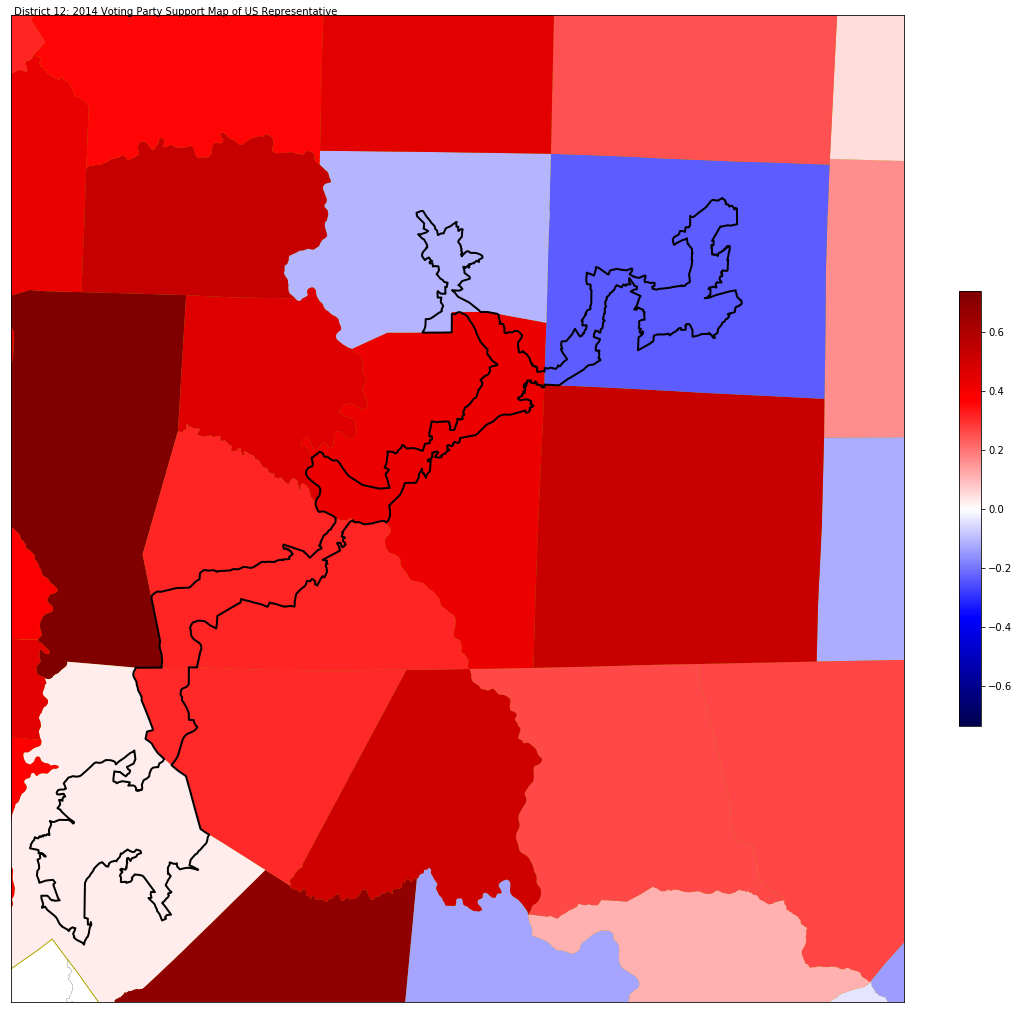

In [224]:
fig, ax = plt.subplots(figsize=(20,20))

# westlimit=-81.0096; southlimit=35.0132; eastlimit=-79.3991; northlimit=36.4585

m = Basemap(llcrnrlon=-81.0096, llcrnrlat=35.0132, urcrnrlon=-79.3991, urcrnrlat=36.4585, resolution="h",
    projection="merc"
)

m.readshapefile("/Users/yiliwang/Desktop/county_nc","county_nc",linewidth=2, color='y') 

m.drawcoastlines()
m.drawcounties()

map_shapes = pd.DataFrame({
        'shapes': [Polygon(np.array(geometry), True) for geometry in m.county_nc]
    })


cmap = plt.get_cmap('seismic')   
pc = PatchCollection(map_shapes.shapes, zorder=2)
norm = Normalize()
pc.set_facecolor(cmap(norm(county_shp_win['Win Party'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(county_shp_win['Win Party'])
plt.colorbar(mapper, shrink=0.4)

# m.readshapefile("/Users/yiliwang/Desktop/county_nc","county_nc",linewidth=2, color='y')

plt.annotate(' District 12: 2014 Voting Party Support Map of US Representative', xy=(0, 1), xycoords='axes fraction')


# 2014 District
m.readshapefile("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/NC_2014_CD12","NC_2014_CD12",linewidth=2, color='black')

(13,
 5,
 [-84.321869, 33.844517, 0.0, 0.0],
 [-75.45865933298364, 36.588117, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x183572310>)

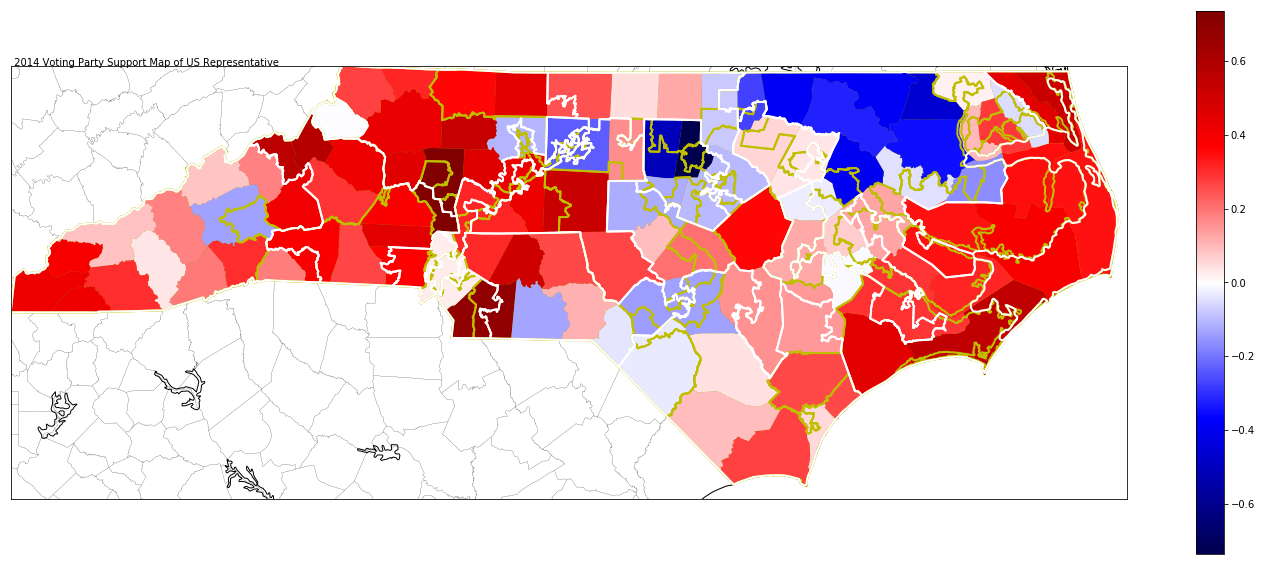

In [225]:
fig, ax = plt.subplots(figsize=(25,25))

m = Basemap(llcrnrlon=-84.3219, llcrnrlat=33.7529, urcrnrlon=-75.4001, urcrnrlat=36.588, resolution="h",
    projection="merc"
)

m.readshapefile("/Users/yiliwang/Desktop/county_nc","county_nc",linewidth=2, color='y') 

m.drawcoastlines()
m.drawcounties()

map_shapes = pd.DataFrame({
        'shapes': [Polygon(np.array(geometry), True) for geometry in m.county_nc]
    })


cmap = plt.get_cmap('seismic')   
pc = PatchCollection(map_shapes.shapes, zorder=2)
norm = Normalize()
pc.set_facecolor(cmap(norm(county_shp_win['Win Party'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(county_shp_win['Win Party'])
plt.colorbar(mapper, shrink=0.4)

# m.readshapefile("/Users/yiliwang/Desktop/county_nc","county_nc",linewidth=2, color='y')

plt.annotate(' 2014 Voting Party Support Map of US Representative', xy=(0, 1), xycoords='axes fraction')


# 2014 District
m.readshapefile("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/NC_CD14","NC_CD14",linewidth=2, color='y')

# 2008 District
m.readshapefile("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/Project Materials/Shapefiles_Congressional Districts/cd37_110_shp/cd37_110","cd37_110",linewidth=2, color='white') 

##### 2008 Voting Data

In [99]:
results_pct_20081104 = pd.read_csv('/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/Polling Data_ precinct level/results_pct_20081104.txt', sep=",")

In [101]:
# Extract US HOUSE OF REPRESENTATIVES data
t = ['US HOUSE OF REPRESENTATIVES DISTRICT' in item for item in results_pct_20081104['contest']]
ind_t = [i for i, x in enumerate(t) if x] # return index of true in boolean list
voting_USR_08 = pd.DataFrame([results_pct_20081104.iloc[ind] for ind in ind_t])

In [203]:
voting_USR_08

,county,precinct,contest_type,runoff_status,recount_status,contest,choice,winner_status,party,Election Day,Absentee / One Stop,Provisional,total votes,district
34155,ALAMANCE,PATTERSON,S,0,0,US HOUSE OF REPRESENTATIVES DISTRICT 6,Teresa Sue Bratton,0,DEM,197,276,3,476,Not Found
34156,ALAMANCE,COBLE,S,0,0,US HOUSE OF REPRESENTATIVES DISTRICT 6,Teresa Sue Bratton,0,DEM,173,224,6,403,Not Found
34157,ALAMANCE,BOONE 5,S,0,0,US HOUSE OF REPRESENTATIVES DISTRICT 6,Teresa Sue Bratton,0,DEM,325,417,2,744,Not Found
34158,ALAMANCE,CENTRAL BOONE,S,0,0,US HOUSE OF REPRESENTATIVES DISTRICT 6,Teresa Sue Bratton,0,DEM,136,322,1,459,Not Found
34159,ALAMANCE,NORTH BOONE,S,0,0,US HOUSE OF REPRESENTATIVES DISTRICT 6,Teresa Sue Bratton,0,DEM,332,470,3,805,Not Found
34160,ALAMANCE,SOUTH BOONE,S,0,0,US HOUSE OF REPRESENTATIVES DISTRICT 6,Teresa Sue Bratton,0,DEM,339,689,8,1036,Not Found
34161,ALAMANCE,WEST BOONE,S,0,0,US HOUSE OF REPRESENTATIVES DISTRICT 6,Teresa Sue Bratton,0,DEM,237,233,4,474,Not Found
34162,ALAMANCE,WEST BOONE SAT,S,0,0,US HOUSE OF REPRESENTATIVES DISTRICT 6,Teresa Sue Bratton,0,DEM,111,116,0,227,Not Found
34163,ALAMANCE,MORTON,S,0,0,US HOUSE OF REPRESENTATIVES DISTRICT 6,Teresa Sue Bratton,0,DEM,262,349,2,613,Not Found
34164,ALAMANCE,FAUCETTE,S,0,0,US HOUSE OF REPRESENTATIVES DISTRICT 6,Teresa Sue Bratton,0,DEM,130,222,1,353,Not Found


In [103]:
#NC_county = list(voting_USR['County'].unique())

100

In [152]:
county_winner_list08 = [find_winner_party(county,voting_USR_08) for county in NC_county]

In [193]:
county_winner_df08 = pd.DataFrame(np.column_stack([NC_county, county_winner_list08]), 
                               columns=['County', 'Win Party'])

In [194]:
county_winner_df08['Win Party'] = [float(item) for item in county_winner_df08['Win Party']] # convert type to integer

In [195]:
# adjust extreme values for color bar
# set the minimum negative value to be -1*max value
ind_max= county_shp_win[county_winner_df08['Win Party']==max(county_winner_df08 ['Win Party'])].index
county_winner_df08.set_value(ind_max, 'Win Party', -min(county_winner_df08['Win Party']))

,County,Win Party
0,ALAMANCE,0.159939
1,ALEXANDER,0.301157
2,ALLEGHANY,0.143505
3,ANSON,-0.301977
4,ASHE,0.094790
5,AVERY,0.386467
6,BEAUFORT,0.193102
7,BERTIE,-0.489592
8,BLADEN,-0.631307
9,BRUNSWICK,-0.216616


(13,
 5,
 [-84.321869, 33.844517, 0.0, 0.0],
 [-75.45865933298364, 36.588117, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x15a8f9ed0>)

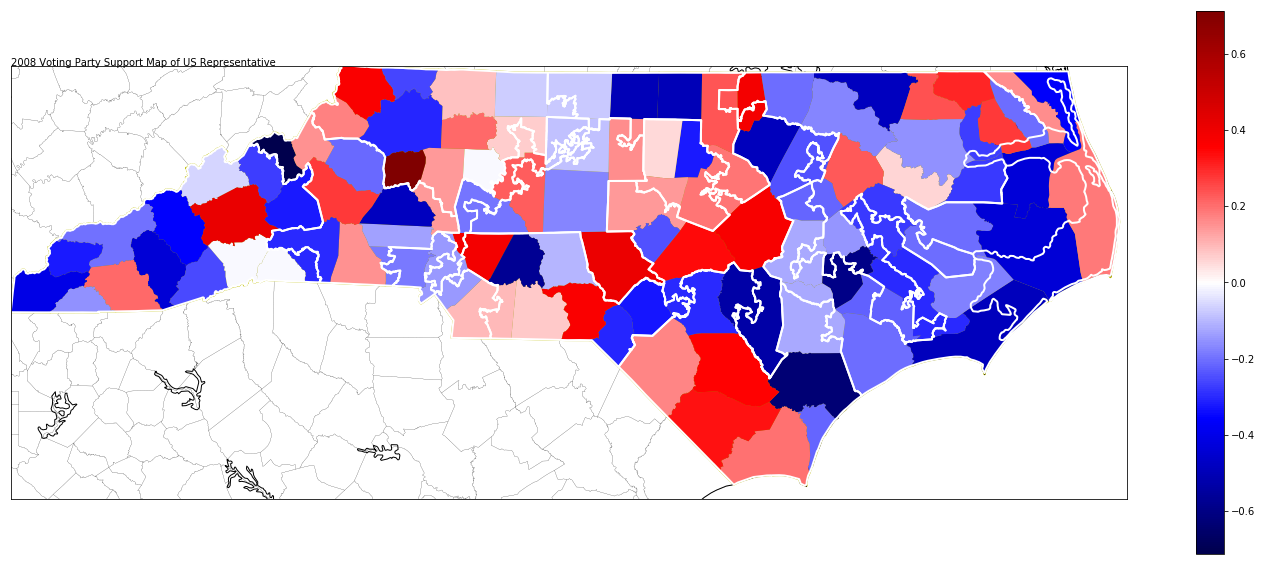

In [200]:
fig, ax = plt.subplots(figsize=(25,25))


m = Basemap(llcrnrlon=-84.3219, llcrnrlat=33.7529, urcrnrlon=-75.4001, urcrnrlat=36.588, resolution="h",
    projection="merc"
)

m.readshapefile("/Users/yiliwang/Desktop/county_nc","county_nc",linewidth=2, color='y') 

m.drawcoastlines()
m.drawcounties()

map_shapes = pd.DataFrame({
        'shapes': [Polygon(np.array(geometry), True) for geometry in m.county_nc]
    })


cmap = plt.get_cmap('seismic')   
pc = PatchCollection(map_shapes.shapes, zorder=2)
norm = Normalize()
pc.set_facecolor(cmap(norm(county_winner_df08['Win Party'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
mapper.set_array(county_winner_df08['Win Party'])
plt.colorbar(mapper, shrink=0.4)

plt.annotate('2008 Voting Party Support Map of US Representative', xy=(0, 1), xycoords='axes fraction')


# 2014 District
# m.readshapefile("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/NC_CD14","NC_CD14",linewidth=2, color='y')

# 2008 District
m.readshapefile("/Users/yiliwang/Documents/Academic/Senior_year/Spring2017/STA160/Project Materials/Shapefiles_Congressional Districts/cd37_110_shp/cd37_110","cd37_110",linewidth=2, color='white') 

### Something Else

In [205]:
cd12_08 = voting_USR_08[voting_USR_08['contest'] == 'US HOUSE OF REPRESENTATIVES DISTRICT 12']

In [209]:
print sum(cd12_08[cd12_08['party'] == 'DEM']['total votes'])
print sum(cd12_08[cd12_08['party'] == 'REP']['total votes'])

215908
85814
